In [500]:
from sklearn.linear_model import LogisticRegression 
import csv
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
import graphviz 
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy.stats.kde import gaussian_kde

#### Section 1 - Describing the dataset and analysing it
The Titanic dataset is loaded using pandas. The dataframe is named df1 and can be found below.

The dataset is described below :

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [357]:
data= pd.read_csv("C:\\Users\\ar1\\Documents\\Kaggle\\train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Section 2 - Processing data

In [358]:
def load_data():
    ### Loading the test and train data. Removing 'Survived' from the existing train_data dataset 
    train_data= pd.read_csv("C:\\Users\\ar1\\Documents\\Kaggle\\train.csv")
    target_value = train_data.Survived
    train_data.drop('Survived',1,inplace=True)  
    test_data= pd.read_csv("C:\\Users\\ar1\\Documents\\Kaggle\\test.csv")
    data= train_data.append(test_data)
    return data 

In [359]:
data =load_data()

In [360]:
data.drop('Name',1,inplace=True)

median_age= data['Age'].median()
data['Age'].fillna(data['Age'].median(),inplace=True)

data['Sex']=data['Sex'].map({'male':1,'female':0})

data.drop('Ticket',1,inplace=True)

data.head(891).Fare.fillna(data.iloc[891:].Fare.mean(),inplace=True)
data.iloc[891:].Fare.fillna(data.iloc[891:].Fare.mean(),inplace=True)

data.Cabin.fillna('N', inplace=True)  
data['Cabin'] = data['Cabin'].map(lambda c : c[0])
cdum = pd.get_dummies(data['Cabin'], prefix='Cabin')
data = pd.concat([data,cdum], axis=1)
data.drop('Cabin', axis=1, inplace=True)

data.head(891).Embarked.fillna('S', inplace=True)
data.iloc[891:].Embarked.fillna('S', inplace=True)
edum = pd.get_dummies(data['Embarked'],prefix='Embarked')
data = pd.concat([data,edum],axis=1)
data.drop('Embarked',axis=1,inplace=True)

data.Pclass.fillna(data['Pclass'].median(), inplace=True)
Pclass_dummy = pd.get_dummies(data['Pclass'], prefix='Pclass')
data = pd.concat([data,Pclass_dummy], axis=1)
data.drop('Pclass', axis=1, inplace=True)

data.drop('PassengerId',axis=1,inplace=True)

data.Parch.fillna(data['Parch'].median(), inplace=True)
Parch_dummy = pd.get_dummies(data['Parch'], prefix='Parch')
data = pd.concat([data,Parch_dummy], axis=1)
data.drop('Parch', axis=1, inplace=True)

data.SibSp.fillna(data['SibSp'].median(), inplace=True)
SibSp_dummy = pd.get_dummies(data['SibSp'], prefix='SibSp')
data = pd.concat([data,SibSp_dummy], axis=1)
data.drop('SibSp', axis=1, inplace=True)




C:\Users\ar1\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [361]:
data

,Sex,Age,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,Parch_5,Parch_6,Parch_9,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,1,22.0,7.2500,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,38.0,71.2833,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,26.0,7.9250,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,35.0,53.1000,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1,28.0,8.4583,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,54.0,51.8625,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
7,1,2.0,21.0750,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,27.0,11.1333,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,14.0,30.0708,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Section 3-  Extracting Training data and Test data

In [557]:
def get_train_test_data():
    extract_target = pd.read_csv('C:\\Users\\ar1\\Documents\\Kaggle\\train.csv')
    targets_data_val = extract_target.Survived
    train_data_val = data.head(891)
    test_data_val = data.iloc[891:]
    
    return train_data_val, test_data_val, targets_data_val

In [558]:
train,test,target= get_train_test_data()
data_feature_names= list(data.columns.values)
y_true= pd.read_csv("C:\\Users\\ar1\\Documents\\Kaggle\\gender_submission.csv")

In [559]:
y_true.drop('PassengerId',axis=1,inplace=True)


####  Section 4- Logistic Regression 
Logisitic Regression with Penalty l2 and Penalty l1

In [364]:
### Logistic Regression with penalty l2 - The 10 features and it's weights are printed below in ascending order
clf = LogisticRegression(penalty='l2')
clf.fit(train,target)
coeff= clf.coef_[0]
count=0
coeff_l2_abs= np.abs(coeff)
coeff_l2_argsort= coeff_l2_abs.argsort()
for val in coeff_l2_argsort[23:]:
    print("Feature Name :{0} -------- It's Weight : {1}".format(data_feature_names[val],clf.coef_[0][val]))


Feature Name :SibSp_3 -------- It's Weight : -0.621016637135229
Feature Name :SibSp_8 -------- It's Weight : -0.6617093439452865
Feature Name :Cabin_G -------- It's Weight : -0.6660320494661823
Feature Name :SibSp_2 -------- It's Weight : 0.6808094184066947
Feature Name :Parch_1 -------- It's Weight : 0.699303540288617
Feature Name :Pclass_1 -------- It's Weight : 0.8235773736690177
Feature Name :Cabin_E -------- It's Weight : 0.9884748385019202
Feature Name :SibSp_0 -------- It's Weight : 1.0147280880664054
Feature Name :SibSp_1 -------- It's Weight : 1.1146724907920376
Feature Name :Sex -------- It's Weight : -2.5342169079595394


In [560]:
clf.score(train, target)

0.66329966329966328

In [561]:
clf.score(test,y_true)

0.66267942583732053

In [365]:
### Logistic Regression with penalty l1 - The 10 features and it's weights are printed below in ascending order
clf_l1 = LogisticRegression(penalty='l1')
clf_l1.fit(train,target)
coeff_l1=clf_l1.coef_[0]
count=0
coeff_l1_abs= np.abs(coeff_l1)
coeff_l1_argsort= coeff_l1_abs.argsort()
for val in coeff_l1_argsort[23:]:
    print("Feature Name :{0} -------- It's Weight : {1}".format(data_feature_names[val],clf_l1.coef_[0][val]))

Feature Name :Pclass_3 -------- It's Weight : -0.3774409828210402
Feature Name :Embarked_C -------- It's Weight : 0.37871645206729326
Feature Name :Cabin_N -------- It's Weight : -0.6327425724059332
Feature Name :Pclass_2 -------- It's Weight : 0.6529005455974077
Feature Name :Cabin_E -------- It's Weight : 0.8509690176954541
Feature Name :Pclass_1 -------- It's Weight : 1.044249962078912
Feature Name :SibSp_2 -------- It's Weight : 1.1066457015554183
Feature Name :SibSp_0 -------- It's Weight : 1.5070780679684994
Feature Name :SibSp_1 -------- It's Weight : 1.5888538366289788
Feature Name :Sex -------- It's Weight : -2.566909473849071


In [548]:
clf_l1.score(train, target)

0.65432098765432101

In [562]:
clf_l1.score(test,y_true)

0.66507177033492826

#### Section - 5 Decision Tree

In [366]:
dt = tree.DecisionTreeClassifier(max_depth=6)
dt.fit(train,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

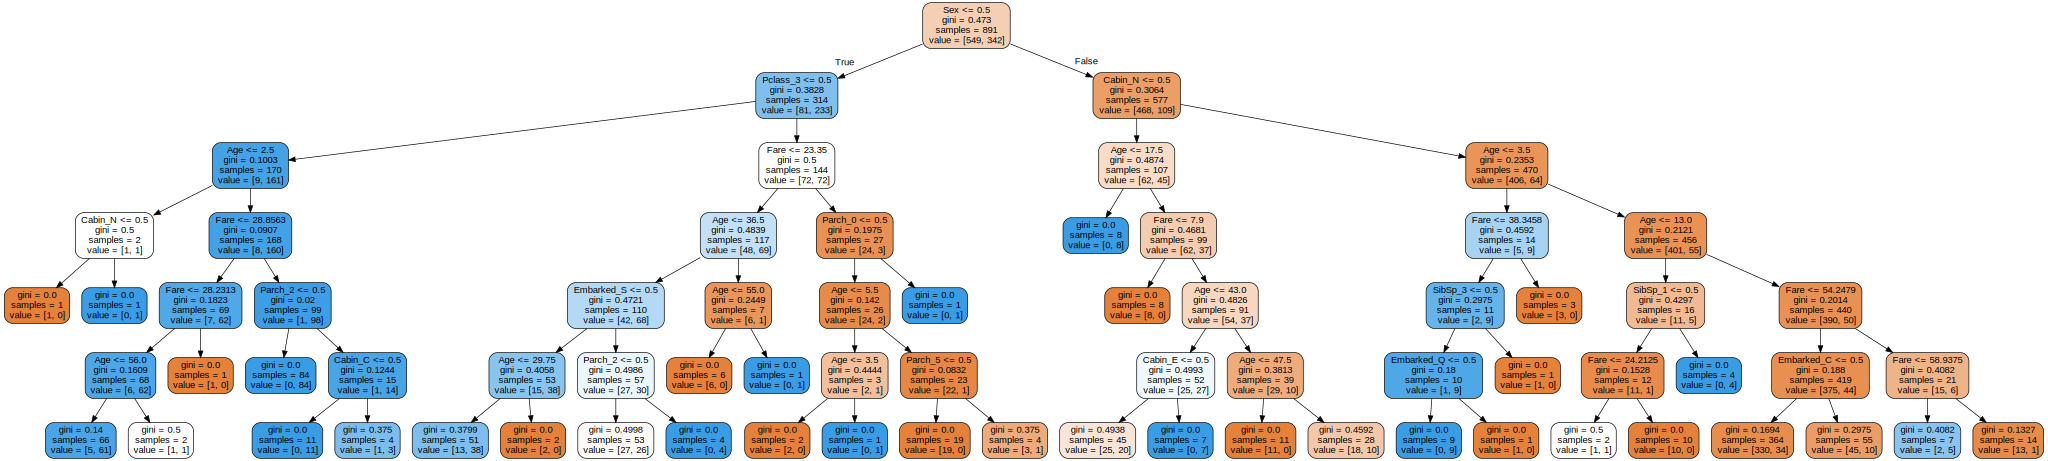

In [367]:
dt_graph = tree.export_graphviz(dt,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dt_graph)  
graph


#### Discussion 

Penalty l2 - Logistic Regression 

Feature Name :SibSp_3 -------- It's Weight : -0.621016637135229
Feature Name :SibSp_8 -------- It's Weight : -0.6617093439452865
Feature Name :Cabin_G -------- It's Weight : -0.6660320494661823
Feature Name :SibSp_2 -------- It's Weight : 0.6808094184066947
Feature Name :Parch_1 -------- It's Weight : 0.699303540288617
Feature Name :Pclass_1 -------- It's Weight : 0.8235773736690177
Feature Name :Cabin_E -------- It's Weight : 0.9884748385019202
Feature Name :SibSp_0 -------- It's Weight : 1.0147280880664054
Feature Name :SibSp_1 -------- It's Weight : 1.1146724907920376
Feature Name :Sex -------- It's Weight : -2.5342169079595394

Penalty l1 - Logistic Regression
Feature Name :Pclass_3 -------- It's Weight : -0.3774409828210402
Feature Name :Embarked_C -------- It's Weight : 0.37871645206729326
Feature Name :Cabin_N -------- It's Weight : -0.6327425724059332
Feature Name :Pclass_2 -------- It's Weight : 0.6529005455974077
Feature Name :Cabin_E -------- It's Weight : 0.8509690176954541
Feature Name :Pclass_1 -------- It's Weight : 1.044249962078912
Feature Name :SibSp_2 -------- It's Weight : 1.1066457015554183
Feature Name :SibSp_0 -------- It's Weight : 1.5070780679684994
Feature Name :SibSp_1 -------- It's Weight : 1.5888538366289788
Feature Name :Sex -------- It's Weight : -2.566909473849071

Decision Tree 
Decision Tree: 
Three important features as per the Decision Tree classifier
Sex, PClass_3, Cabin_N

Based on the above results, it can be concluded that Sex is one of the most important feature. The decisions made by the models are majorly based on sex. Apart from sex, other features like  Cabin_N, SibSp1,sibSp_0 play a major role and can be considered as important features( they carry a lot of weightage). These results are based on non-scaled data.

#### Section - 6 Z-score using standard scaler

In [368]:
### Finding z-scores of all features using standard scaler - Train
train_scale = np.array(train)
train_scaled_val = preprocessing.scale(train_scale)
train_scaler = preprocessing.StandardScaler().fit(train_scale)
train_fit=train_scaler.fit_transform(train_scale)
train_fit

array([[ 0.73769513, -0.56573646, -0.50244517, ..., -0.14359163,
        -0.07512217, -0.08898625],
       [-1.35557354,  0.66386103,  0.78684529, ..., -0.14359163,
        -0.07512217, -0.08898625],
       [-1.35557354, -0.25833709, -0.48885426, ..., -0.14359163,
        -0.07512217, -0.08898625],
       ..., 
       [-1.35557354, -0.1046374 , -0.17626324, ..., -0.14359163,
        -0.07512217, -0.08898625],
       [ 0.73769513, -0.25833709, -0.04438104, ..., -0.14359163,
        -0.07512217, -0.08898625],
       [ 0.73769513,  0.20276197, -0.49237783, ..., -0.14359163,
        -0.07512217, -0.08898625]])

In [369]:
### Finding z-scores of all features using standard scaler - Test
test_scale = np.array(test)
test_predict = train_scaler.transform(test_scale)
test_predict

array([[ 0.73769513,  0.39488658, -0.49078316, ..., -0.14359163,
        -0.07512217, -0.08898625],
       [-1.35557354,  1.35550962, -0.50747884, ..., -0.14359163,
        -0.07512217, -0.08898625],
       [ 0.73769513,  2.50825727, -0.45336687, ..., -0.14359163,
        -0.07512217, -0.08898625],
       ..., 
       [ 0.73769513,  0.70228595, -0.50244517, ..., -0.14359163,
        -0.07512217, -0.08898625],
       [ 0.73769513, -0.1046374 , -0.48633742, ..., -0.14359163,
        -0.07512217, -0.08898625],
       [ 0.73769513, -0.1046374 , -0.19824428, ..., -0.14359163,
        -0.07512217, -0.08898625]])

###### Logisitic Regressions with penalty as l2 on scaled date

In [370]:
### Top ten features are printed below in ascending order.
train_scaled= pd.DataFrame(train_fit)
clf = LogisticRegression(penalty='l2')
clf.fit(train_scaled,target)
coeff= clf.coef_[0]
count=0
coeff_l2_abs= np.abs(coeff)
coeff_l2_argsort= coeff_l2_abs.argsort()
for val in coeff_l2_argsort[23:]:
    print("Feature Name :{0} -------- It's Weight : {1}".format(data_feature_names[val],clf.coef_[0][val]))


Feature Name :Cabin_N -------- It's Weight : -0.20560190149648552
Feature Name :Cabin_E -------- It's Weight : 0.24295837981683968
Feature Name :SibSp_3 -------- It's Weight : -0.24334691349135942
Feature Name :Pclass_1 -------- It's Weight : 0.2705087258057155
Feature Name :Parch_4 -------- It's Weight : -0.31342075326605245
Feature Name :Pclass_3 -------- It's Weight : -0.33377638268509574
Feature Name :SibSp_5 -------- It's Weight : -0.33738040625669613
Feature Name :SibSp_8 -------- It's Weight : -0.41052694086759844
Feature Name :Age -------- It's Weight : -0.49431447804218426
Feature Name :Sex -------- It's Weight : -1.27864360241347


In [563]:
clf.score(train_scaled, target)

0.82379349046015715

In [564]:
clf.score(test_predict,y_true)

0.94019138755980858

###### Logisitic Regressions with penalty as l1 on scaled date

In [371]:
### Top ten features are printed below in ascending order.
clf_l1 = LogisticRegression(penalty='l1')
clf_l1.fit(train_scaled,target)
coeff_l1=clf_l1.coef_[0]
coeff_l1_abs= np.abs(coeff_l1)
coeff_l1_argsort= coeff_l1_abs.argsort()
for val in coeff_l1_argsort[23:]:
    print("Feature Name :{0} -------- It's Weight : {1}".format(data_feature_names[val],clf_l1.coef_[0][val]))

Feature Name :Cabin_E -------- It's Weight : 0.17490022427604068
Feature Name :SibSp_4 -------- It's Weight : -0.21741968964571806
Feature Name :Parch_4 -------- It's Weight : -0.23966208306138076
Feature Name :SibSp_3 -------- It's Weight : -0.26681373135667563
Feature Name :SibSp_5 -------- It's Weight : -0.2748011471752534
Feature Name :Cabin_N -------- It's Weight : -0.34573614075602305
Feature Name :SibSp_8 -------- It's Weight : -0.3538626370560796
Feature Name :Age -------- It's Weight : -0.4846800800283575
Feature Name :Pclass_3 -------- It's Weight : -0.4867080540422016
Feature Name :Sex -------- It's Weight : -1.277042785293598


In [547]:
clf_l1.score(train_scaled, target)

0.82379349046015715

In [565]:
clf_l1.score(test_predict,y_true)

0.94736842105263153

###### Decision Tree on scaled data

In [372]:
dt = tree.DecisionTreeClassifier(max_depth=6)
dt.fit(train_scaled,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

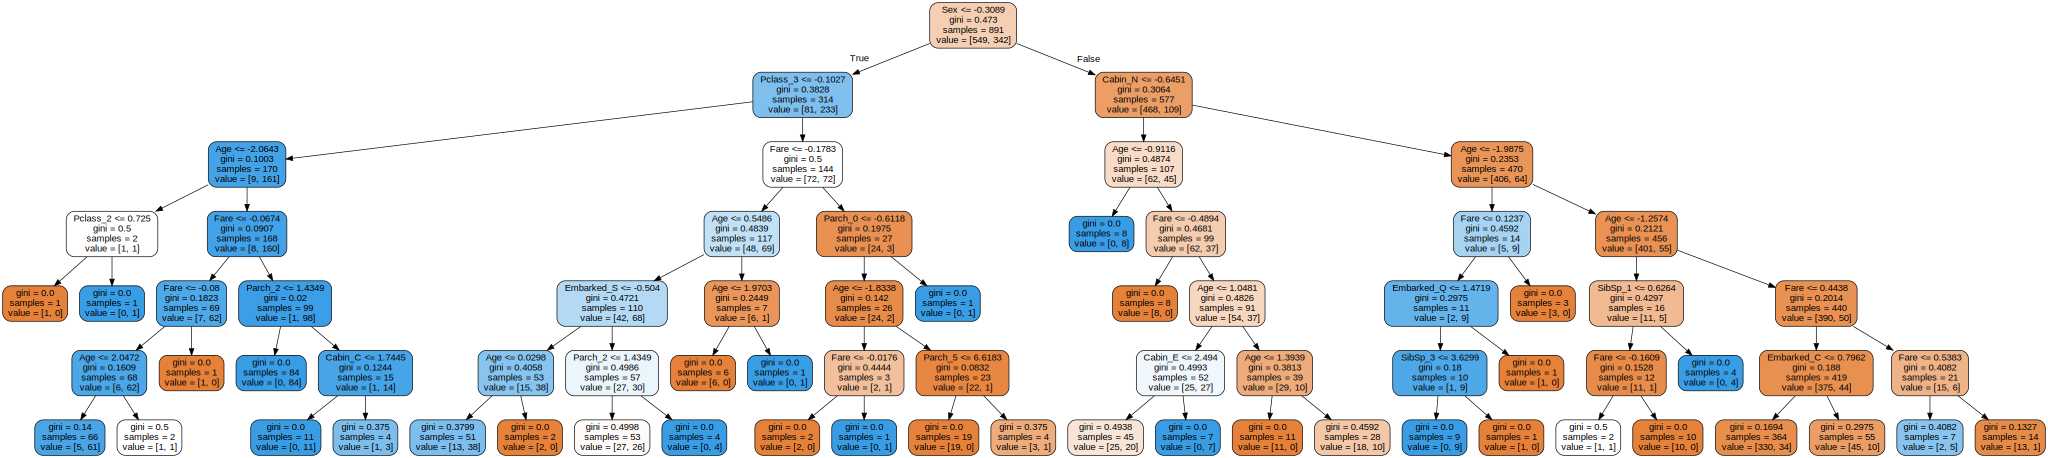

In [373]:
data_feature_names= list(data.columns.values)
dot_data = tree.export_graphviz(dt,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)  
graph


#### Discussion - Scaled Data

Penalty - l2 : Logistic Regression 

Feature Name :Cabin_N -------- It's Weight : -0.20560190149648552
Feature Name :Cabin_E -------- It's Weight : 0.24295837981683968
Feature Name :SibSp_3 -------- It's Weight : -0.24334691349135942
Feature Name :Pclass_1 -------- It's Weight : 0.2705087258057155
Feature Name :Parch_4 -------- It's Weight : -0.31342075326605245
Feature Name :Pclass_3 -------- It's Weight : -0.33377638268509574
Feature Name :SibSp_5 -------- It's Weight : -0.33738040625669613
Feature Name :SibSp_8 -------- It's Weight : -0.41052694086759844
Feature Name :Age -------- It's Weight : -0.49431447804218426
Feature Name :Sex -------- It's Weight : -1.27864360241347

Penalty - l1 : Logistic Regression
Feature Name :Cabin_E -------- It's Weight : 0.17490022427604068
Feature Name :SibSp_4 -------- It's Weight : -0.21741968964571806
Feature Name :Parch_4 -------- It's Weight : -0.23966208306138076
Feature Name :SibSp_3 -------- It's Weight : -0.26681373135667563
Feature Name :SibSp_5 -------- It's Weight : -0.2748011471752534
Feature Name :Cabin_N -------- It's Weight : -0.34573614075602305
Feature Name :SibSp_8 -------- It's Weight : -0.3538626370560796
Feature Name :Age -------- It's Weight : -0.4846800800283575
Feature Name :Pclass_3 -------- It's Weight : -0.4867080540422016
Feature Name :Sex -------- It's Weight : -1.277042785293598

Decision Tree: 
Sex, PClass_3, Cabin_N are important features according to Decision Tree

With scaled data and non-scaled data, it is observed that the feature "Sex" is of major importance. With non-scaled data, Age was not in the top 10 important features but with scaled data "Age" is an important feature and it is found in the top ten important features. 

Decision tree has the same top 3 features : Sex, PClass_3 and Cabin_N, for both, scaled and non-scaled data. I think, irrespective of the data being scaled or not, Decision Tree will produced the same results like observed. 

From this observation, I think decision tree does not benefit much from standardization of the data set whereas on the other hand, Logisitic Regression chooses different features like Age, Parch_4  using scaled data. It can be said that Logistic Regression benefits from scaling of data as the algorithm learns better.



#### Section 7 -  Evidence Calculation

In [512]:
### Calculating the positive evidence and negative evidence by multiplying coeffs and attribute values. The positive evidence is 
### calculated by checking for values greater than 0 and negative evidence is calculated for values lesser than 0. 
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
pos_evi=[]
neg_evi=[]
pos_count=0
neg_count=0
evidence_val = (np.matmul(test_predict,clf.coef_[0]))
for i in evidence_val:
    if i>0:
        pos_evi.append(i)
        pos_count += 1
    elif i<0:
        neg_evi.append(i)
        neg_count += 1

###### Total Positive Evidence 

In [513]:
#### The number of positive evidences can be found below
print("The total Positive Evidence: {0}".format(pos_count))

The total Poitive Evidence: 191


In [505]:
### Total Positive evidence can be found below
positive_evidence_df= pd.DataFrame(pos_evi)
positive_evidence_df.columns=['Pos']
total= positive_evidence_df['Pos'].sum()
total


346.72713854784706

#### Total Negative Evidence

In [514]:
#### The number of Negative evidences can be found below
print("The total Negative Evidence: {0}".format(neg_count))

The total Negative Evidence: 227


In [507]:
### Total Negative evidence can be found below
negative_evidence_df= pd.DataFrame(neg_evi)
negative_evidence_df.columns=['Neg']
total= negative_evidence_df['Neg'].sum()
total

-294.54214933057165

#### Top  3 features that contribute the most to the positive evidence and negative evidence

In [534]:
### Choosing the positive evidence and negative evidence from the below dataframe. Sorting it will proive in finding the positive evidence and negative evidence
### Positive - 364th object
### Negative - 139 Object
evidence_dataframe= pd.DataFrame(evidence_val)
evidence_dataframe.columns= ['val']
result= evidence_dataframe.sort(['val'])
result

C:\Users\ar1\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,val
139,-6.926671
360,-5.833772
145,-3.854454
188,-3.670065
132,-3.623766
394,-3.478422
174,-3.190871
140,-2.922820
152,-2.829822
154,-2.641721


In [531]:
feature_positive= test_predict[364]
for i,val in enumerate(feature_positive):
     feature=val*clf.coef_[0]
feature

array([0.113782, 0.043987, -0.013661, -0.005635, -0.006596, 0.002622,
       -0.013181, -0.021620, -0.005580, 0.009490, 0.018296, 0.012163,
       -0.005954, -0.004513, 0.008056, -0.024072, -0.011011, 0.029702,
       0.000554, -0.008235, -0.000951, -0.002112, 0.027890, 0.008281,
       0.014985, -0.000000, -0.010701, -0.013681, -0.000143, 0.021655,
       0.017488, 0.030022, 0.036531])

#### Top 3 features for positive evidence :
Sex :0.1137 ;
Age : 0.0439 ;
Sibsp_8 : 0.0365


In [535]:
feature_negative= test_predict[139]
for i,val in enumerate(feature_negative):
     feature=val*clf.coef_[0]
feature

array([0.113782, 0.043987, -0.013661, -0.005635, -0.006596, 0.002622,
       -0.013181, -0.021620, -0.005580, 0.009490, 0.018296, 0.012163,
       -0.005954, -0.004513, 0.008056, -0.024072, -0.011011, 0.029702,
       0.000554, -0.008235, -0.000951, -0.002112, 0.027890, 0.008281,
       0.014985, -0.000000, -0.010701, -0.013681, -0.000143, 0.021655,
       0.017488, 0.030022, 0.036531])

#### Top 3 features for negative evidence :
SibSp_1 : -0.013681 ;
Cabin_E : -0.021620 ;
Pclass_1 : -0.024072



In [543]:
list(data.columns.values)

['Sex',
 'Age',
 'Fare',
 'Cabin_A',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_N',
 'Cabin_T',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Parch_0',
 'Parch_1',
 'Parch_2',
 'Parch_3',
 'Parch_4',
 'Parch_5',
 'Parch_6',
 'Parch_9',
 'SibSp_0',
 'SibSp_1',
 'SibSp_2',
 'SibSp_3',
 'SibSp_4',
 'SibSp_5',
 'SibSp_8']

#### Probability Distribuition 

In [544]:
"""from scipy.stats.kde import gaussian_kde
from numpy import linspace
kde = gaussian_kde( data )
dist_space = linspace( min(data), max(data), 100 )
plt.plot( dist_space, kde(dist_space) )"""

'from scipy.stats.kde import gaussian_kde\nfrom numpy import linspace\nkde = gaussian_kde( data )\ndist_space = linspace( min(data), max(data), 100 )\nplt.plot( dist_space, kde(dist_space) )'

#### Most Positive object with respect to probabilities

In [509]:
### The most positive object wrt probabilities
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
probability_pos_obj= clf.predict_proba(test_predict)
pos_val=np.argmax(probability_pos_obj[:,:1])
print("Most Positive Object: {0} -- Attribute values for that object: {1}".format(pos_val,test_predict[pos_val])) 

Most Positive Object: 139 -- Attribute values for that object: [0.737695 0.817561 0.295895 -0.130856 -0.235981 -0.266296 -0.196116
 -0.193009 -0.121681 -0.067153 0.544925 -0.033520 -0.482043 -0.307562
 0.615838 -0.565685 -0.510152 0.902587 -1.784124 -0.390707 -0.314076
 -0.075122 -0.067153 -0.075122 29.832868 0.000000 -1.465746 1.806421
 -0.180125 -0.135225 -0.143592 -0.075122 -0.088986]


#### Most Negative object with respect to probabilites 

In [510]:
### The most negative object wrt probabilites
probability_neg_obj= clf.predict_proba(test_predict)
neg_val=np.argmin(probability_neg_obj[:,:1])
print("Most Negative Object: {0} -- Attribute values for that object: {1}".format(neg_val,test_predict[neg_val])) 

Most Negative Object: 364 -- Attribute values for that object: [-1.355574 -0.335187 0.467880 -0.130856 -0.235981 -0.266296 -0.196116
 5.181095 -0.121681 -0.067153 -1.835115 -0.033520 2.074505 -0.307562
 -1.623803 1.767767 -0.510152 -1.107926 0.560499 -0.390707 -0.314076
 -0.075122 -0.067153 -0.075122 -0.033520 0.000000 -1.465746 1.806421
 -0.180125 -0.135225 -0.143592 -0.075122 -0.088986]


#### The object with the largest positive evidence

In [511]:
count=0
evidence_val = (np.matmul(test_predict,clf.coef_[0]))
for i in evidence_val:
    if i>0:
        print("Object:{0} Positive evidence value:{1} \n".format(count,evidence_val))
    elif i<0:
        print("Object:{0} Negative evidence value:{1} \n".format(count,evidence_val))
        
    count+= 1

Object:0 Negative evidence value:[-1.544793 0.375601 -1.606981 -1.640571 1.629259 -1.144989 1.302079
 -0.170842 1.747239 -1.613872 -1.680929 -1.006472 3.643204 -1.873285
 3.640360 2.663914 -0.573075 -1.043282 1.138220 0.721551 -0.766795
 -0.686147 2.371423 0.714003 3.956253 -2.391725 4.175377 -1.100264 0.178896
 -1.513621 -1.379441 -0.728380 1.001358 1.200185 0.548662 -0.948299
 0.996092 1.263901 -1.562007 -1.530708 -1.420313 0.952694 -2.174914
 1.912154 3.168347 -1.566875 0.398276 -1.298116 2.941177 0.768418 0.409740
 -0.270337 2.361458 1.418447 -0.306637 -1.915837 -1.946845 -0.555436
 -1.551044 3.975348 -1.263061 -0.838821 -1.301500 1.606280 1.975392
 2.012858 1.758708 -0.993768 0.315853 -2.327509 1.530381 -1.415013 0.957718
 1.311123 3.405977 0.824403 -1.680452 1.449011 -0.764390 1.530381 -0.056529
 -0.723689 -1.120436 -1.680929 -0.312234 -1.182327 1.416816 1.375972
 1.378429 0.722324 1.346628 -1.681302 3.449664 -1.680452 0.165080 -1.567274
 1.169174 -1.718827 1.299391 -1.870392 2.7

In [479]:
np.sort(pos_evi)

array([0.004148, 0.017444, 0.050318, 0.073380, 0.160399, 0.165080,
       0.178896, 0.183585, 0.188035, 0.213987, 0.247479, 0.248601,
       0.270274, 0.273928, 0.315853, 0.375601, 0.398276, 0.399851,
       0.409740, 0.420862, 0.427636, 0.473548, 0.516756, 0.548662,
       0.551754, 0.626204, 0.636600, 0.641616, 0.684761, 0.714003,
       0.721551, 0.722324, 0.756930, 0.768418, 0.785864, 0.824403,
       0.864823, 0.896855, 0.906903, 0.917223, 0.928671, 0.952694,
       0.957718, 0.965396, 0.976813, 0.987480, 0.995242, 0.996092,
       0.996092, 0.996285, 1.001358, 1.016029, 1.036537, 1.047825,
       1.112513, 1.138220, 1.141730, 1.169174, 1.177239, 1.185427,
       1.186032, 1.187925, 1.200185, 1.226841, 1.263901, 1.265642,
       1.299391, 1.299980, 1.302079, 1.305301, 1.311123, 1.321811,
       1.334693, 1.346628, 1.353747, 1.375122, 1.375972, 1.376741,
       1.378339, 1.378377, 1.378429, 1.378429, 1.378429, 1.378429,
       1.378429, 1.378519, 1.378828, 1.402384, 1.416816, 1.418

###### The largest positive evidence is 4.832179 : Object 415

#### The object with the largest negative evidence (in terms of magnitude)

In [480]:
np.sort(neg_evi)

array([-6.926671, -5.833772, -3.854454, -3.670065, -3.623766, -3.478422,
       -3.190871, -2.922820, -2.829822, -2.641721, -2.607634, -2.391725,
       -2.337817, -2.327509, -2.250749, -2.174914, -2.133511, -2.081799,
       -1.986829, -1.979874, -1.946845, -1.915837, -1.873285, -1.870998,
       -1.870392, -1.869924, -1.846916, -1.833860, -1.833254, -1.832404,
       -1.790066, -1.787663, -1.719046, -1.718827, -1.683698, -1.683543,
       -1.682925, -1.682925, -1.681998, -1.681998, -1.681998, -1.681921,
       -1.681302, -1.680980, -1.680955, -1.680929, -1.680929, -1.680929,
       -1.680452, -1.680452, -1.680452, -1.680452, -1.680452, -1.680452,
       -1.680452, -1.678405, -1.675087, -1.643070, -1.642941, -1.640571,
       -1.640571, -1.635711, -1.613872, -1.606981, -1.605326, -1.605326,
       -1.604953, -1.567274, -1.566965, -1.566875, -1.562007, -1.560763,
       -1.551044, -1.544793, -1.530708, -1.530046, -1.529350, -1.529106,
       -1.528500, -1.526607, -1.524559, -1.513621, 

###### The largest negative evidence is -6.926671 - Object : 1

#### Most Uncertain Object 

In [499]:
#### Uncertain object
pd.set_option('display.max_columns', None)
evidence_df=pd.DataFrame(clf.predict_proba(test_predict), columns=clf.classes_)
evidence_df.columns=['Neg','Pos']
evidence_df= evidence_df.sort(['Neg','Pos'],ascending=[1,0])
uncertain_obj= np.array(evidence_df)
print(evidence_df.to_string())

          Neg       Pos
364  0.015498  0.984502
371  0.016901  0.983099
184  0.018294  0.981706
343  0.028775  0.971225
182  0.028890  0.971110
26   0.029466  0.970534
59   0.035758  0.964242
24   0.036422  0.963578
350  0.044030  0.955970
150  0.044278  0.955722
326  0.045376  0.954624
12   0.049152  0.950848
14   0.049285  0.950715
296  0.049658  0.950342
272  0.050180  0.949820
208  0.055003  0.944997
92   0.059029  0.940971
112  0.060537  0.939463
74   0.061502  0.938498
179  0.062797  0.937203
402  0.065030  0.934970
397  0.065091  0.934909
395  0.067017  0.932983
156  0.068427  0.931573
218  0.072593  0.927407
222  0.073112  0.926888
250  0.073226  0.926774
203  0.075897  0.924103
44   0.076734  0.923266
178  0.081037  0.918963
391  0.083015  0.916985
400  0.083387  0.916613
196  0.084059  0.915941
411  0.084118  0.915882
122  0.086709  0.913291
361  0.091168  0.908832
48   0.094456  0.905544
414  0.094823  0.905177
374  0.096939  0.903061
375  0.106052  0.893948
238  0.111117  0

C:\Users\ar1\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


###### Most uncertain object is object 109 with probabilites of 0.4916 and 0.5083

#### Pickle file

In [566]:
a = {}
target_names=[]
target_names=[0,1]

a['X_train'] = train_scaled

a['y_train'] = target

a['X_test'] = test_predict

a['y_test'] = y_true

a['target_names'] = target_names

a['feature_names'] = list(data.columns.values)

import pickle

pickle.dump(a, open("C:\\Users\\ar1\\Documents\\I-ML\\udaan42.pickle", "wb"))